# Pillow - Topographic Map Combiner

This demo uses the Python Image Library (Pillow/PIL) to create a map from tiles sources from the web

Aim:  **Create a printable topographic map from Lat/Long coordinate values that can be used for navigation with a compass.  This nessesitates gridlines**

Steps:
1. Convert Lat/Long of corners to tile reference numbers
2. Carry out a web request for each tile
3. Combine tiles into single image
4. Overlay grid lines at logical Lat/Long points
5. (Ambitios) Label the grid lines !! (Not nessesary - can be done with GPS points but would be cool)


In [2]:
from PIL import Image, ImageDraw

## Open image

In [3]:
first = Image.open("15128_9526.png")

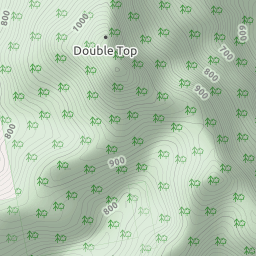

In [4]:
first

In [5]:
first.size

(256, 256)

In [6]:
second = Image.open("15128_9527.png")

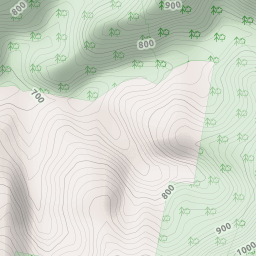

In [7]:
second

In [8]:
third = Image.open("15129_9526.png")

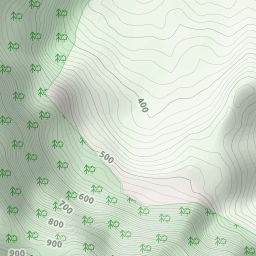

In [9]:
third

In [10]:
forth = Image.open("15129_9527.png")

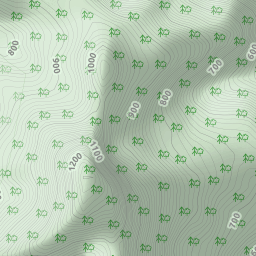

In [11]:
forth

## Create joined image

In [43]:
combined_image = Image.new("RGBA", (256*2, 256*2))

combined_image.paste(first, (0,0))

combined_image.paste(second, (0,256))

combined_image.paste(third, (256,0))

combined_image.paste(forth, (256,256))

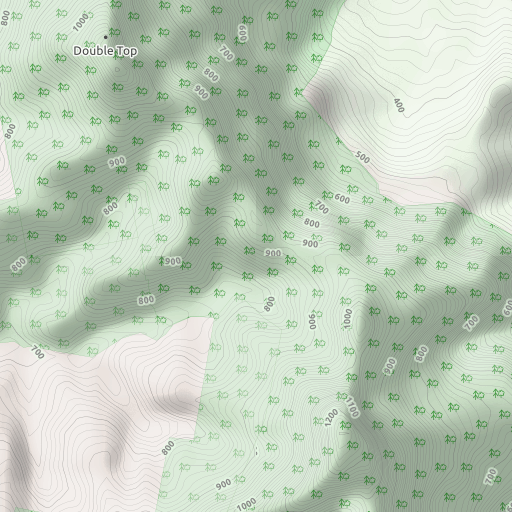

In [44]:
combined_image

## Draw grid lines

In [45]:
from PIL import ImageDraw, ImageDraw2

In [108]:
img = combined_image.copy()

draw = ImageDraw.Draw(img)

# The following doesnt draw two linees, it joins all the giving coords with a 
# line ... hence the diagonal
#draw.line((256, 0, 256, 256*2, 0, 256, 256*2, 256), fill="black", width=1)
#draw.line([(0, 256), (256*2, 256), (256, 0), (256, 256*2)], fill="black", width=1)

# Prints two seperate lines
draw.line((256, 0, 256, 256*2), fill="black", width=1)  # Vertical
draw.line((0, 256, 256*2, 256), fill="black", width=1)  # Horisontal



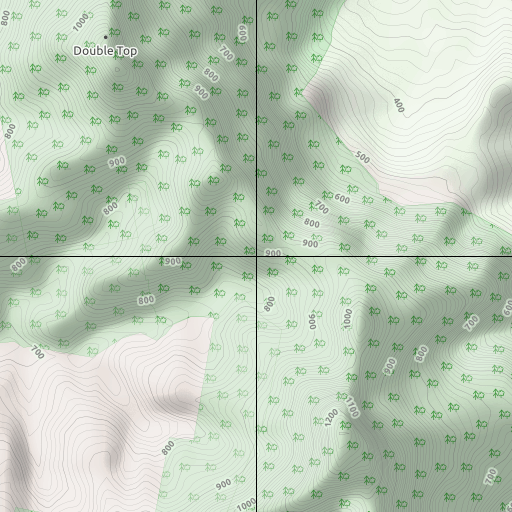

In [110]:
img

### Actually get a grid happening

In [141]:
img = combined_image.copy()
draw = ImageDraw.Draw(img)

In [115]:
# Get dimensions of image 
width, height = img.size

In [116]:
no_lines = 8

In [117]:
import numpy as np

In [122]:
# Vertical lines using division of width
vlines = [(x, 0, x, height) for x in np.arange(0, width, width/no_lines)]

# (x1,y1,x2,y2) - start at point1 end at point2
#vlines

In [126]:
# Horisontal lines using division of width
hlines = [(0, y, width, y) for y in np.arange(0, height, height/no_lines)]

In [142]:
draw = ImageDraw.Draw(img)

# Draw vertical lines
for line in vlines:
    draw.line(line, fill="black", width=1)

In [143]:
# Draw horisontal lines
for line in hlines:
    draw.line(line, fill=(0,0,0,150), width=1)  # Fill- RGBA, final value is transparency 

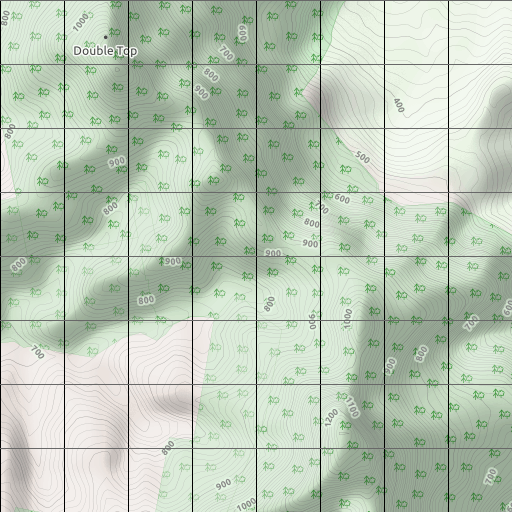

In [144]:
img

## TODO
- need to get returned (or  be able to calculate) the Lat/Long range of the map
- get a Convertions table between pixels and Lat/Long
- use the draw.text() function to write grid ref on each line
- Allow function to import CSV/KML data points, draw a polygon and write the text label